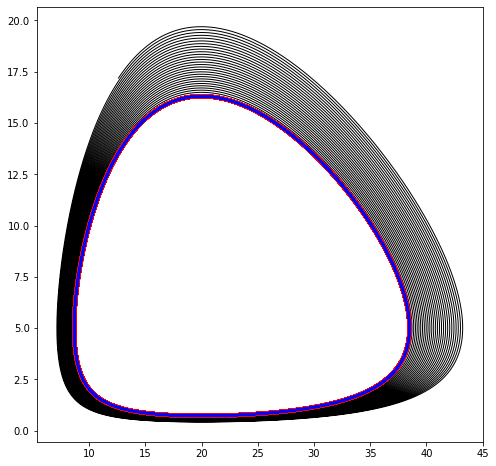

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
        self.N_dim=[]
        
        
    def Initialise(self,x_start,t_start):
        
        
        self.N_dim=np.shape(x_start)[0]
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)               ## The main differenece in comparison to the class in the previous lab is in the definition 
                                             ## and utilisation of variables x and X, which are multidimensional.  
        
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*f(self.x,self.t)
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*f(self.x,self.t)
            self.x=self.x+dt*f(x_mp,self.t+dt/2)
            
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([self.N_dim,N_iter])
        T=np.zeros([N_iter])
        
        X[:,0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=f(self.x,self.t)
            k2=f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[:,n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                
def f(x,t):     ## Definition of the function for Lotka-Volterra. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=0.1
    beta=0.02
    gamma=0.4
    delta=0.02
    
    z=np.zeros([np.shape(x)[0]])
    
    z[0]=x[0]*(alpha-beta*x[1])
    z[1]=x[1]*(delta*x[0]-gamma)
    
    return z

## As in the previous lab, use the class and the function above to complete the exercise...

NM=Numerical_methods(f)           ## Object definition


dt=0.01                           ## Value of dt
N_iter=int(1000/dt)               ## Number of iteration. 

X_euler=np.zeros([2,N_iter])
X_MP=np.zeros([2,N_iter])
X_RK2=np.zeros([2,N_iter])


x_start=[10,10]     
t_start=0.

NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_euler,ts=NM.Euler(dt,N_iter) 

NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_MP,ts=NM.MidPoint(dt,N_iter)

NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object
X_RK2,ts=NM.RungeKutta2(dt,N_iter) 

fig, ax = plt.subplots(figsize=(8, 8))


plt.plot(X_euler[0,:],X_euler[1,:],color='black',linewidth=1)
plt.plot(X_RK2[0,:],X_RK2[1,:],color='red',linewidth=4)
plt.plot(X_MP[0,:],X_MP[1,:],color='b',linewidth=2)

